In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree

Data Collection and Processing


In [ ]:
calories_data = pd.read_csv('/content/drive/MyDrive/CSE422 Project/calories.csv')
exercise_data = pd.read_csv('/content/drive/MyDrive/CSE422 Project/exercise.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Combining two dataframes

In [ ]:
main_data= pd.concat([exercise_data, calories_data['Calories']], axis =1)
# main_data.shape
main_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
main_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
main_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis


In [ ]:
main_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization


In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


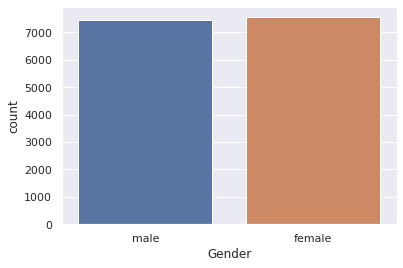

In [ ]:
#Plotting the gender column in count plot
sns.countplot(main_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


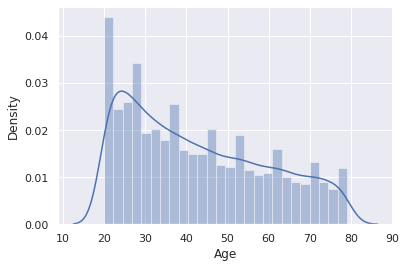

In [ ]:
# Finding the distribution of age column
sns.distplot(main_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


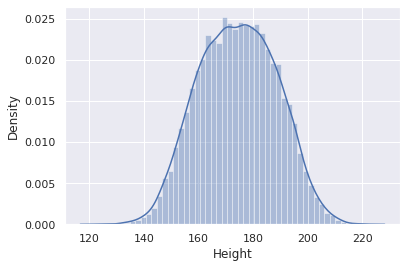

In [ ]:
sns.distplot(main_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


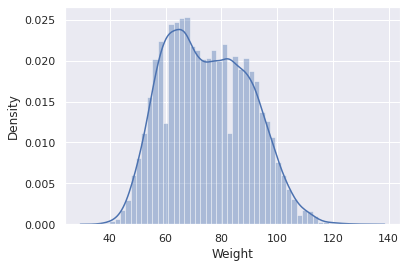

In [ ]:
sns.distplot(main_data['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


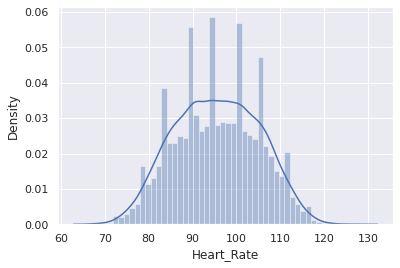

In [ ]:
sns.distplot(main_data['Heart_Rate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


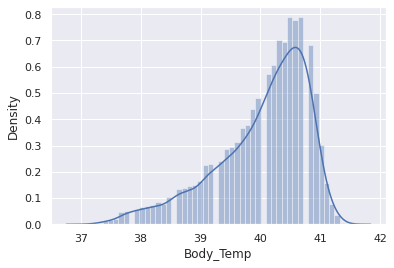

In [ ]:
sns.distplot(main_data['Body_Temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


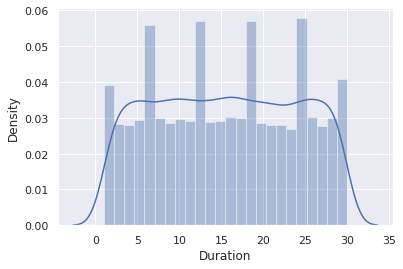

In [ ]:
sns.distplot(main_data['Duration'])

Finding the Correlation in the dataset

In [ ]:
correlation = main_data.corr()

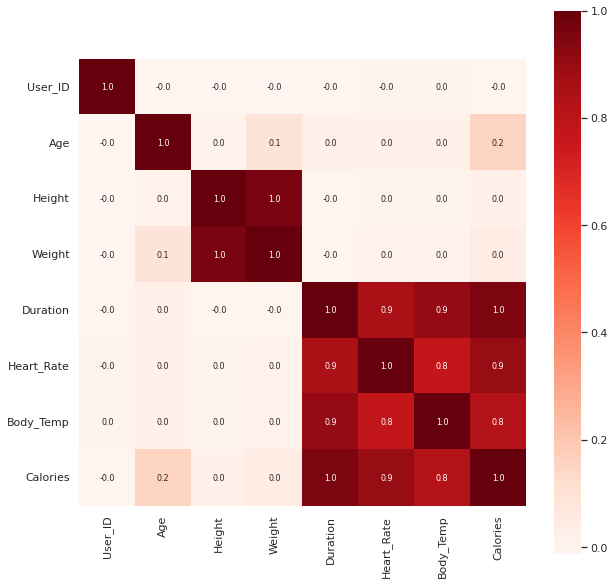

In [ ]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=  True, square = True, fmt ='.1f', annot =True ,  annot_kws = {'size': 8}, cmap ='Reds')

Converting the text data to numeric values

In [ ]:
main_data.replace({'Gender':{'male' : 0,'female': 1}}, inplace = True)

Separating Features and Target

In [ ]:
x= main_data.drop(columns = ['Calories', 'User_ID'], axis= 1)
y= main_data['Calories']

Splitting the data into train data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state= 2)


Model Training

Training data with Linear Regression

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

Evaluation


In [ ]:
test_data_prediction1 = model1.predict(X_test)


Mean Squared Error

In [ ]:
metrics.mean_squared_error(Y_test, test_data_prediction1)

130.08707386188374

Mean Absolute Error

In [ ]:
metrics.mean_absolute_error(Y_test, test_data_prediction1)


8.385188053147187

R squared value

In [ ]:
metrics.r2_score(Y_test , test_data_prediction1)

0.9668790377181355

Training data using XGBoost Regressor

In [ ]:
model2 = XGBRegressor()
model2.fit(X_train, Y_train)

[08:59:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Predicting the test results
test_data_prediction2 = model2.predict(X_test)

Mean Squared Error

In [ ]:
metrics.mean_squared_error(Y_test, test_data_prediction2)

14.506464988228966

R squared value

In [ ]:

metrics.r2_score(Y_test , test_data_prediction2)

0.9963065655529431

Mean Absolute Error

In [ ]:
metrics.mean_absolute_error(Y_test, test_data_prediction2)


2.7159012502233186

Training data using Decision Tree

In [ ]:
model3 = DecisionTreeClassifier(criterion = 'entropy',random_state = 100, max_depth = 20, min_samples_leaf =100)
model3.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=100,
                       random_state=100)

In [ ]:
#Predicting the test result
test_data_prediction3 = model3.predict(X_test)

Mean Squared Error

In [ ]:
metrics.mean_squared_error(Y_test, test_data_prediction3)

134.66666666666666

R squared value

In [ ]:
metrics.r2_score(Y_test, test_data_prediction3)

0.9657130454634819

Mean Absolute Error

In [ ]:
metrics.mean_absolute_error(Y_test, test_data_prediction3)


7.843333333333334

Training data using KNN

In [ ]:
model4 = KNeighborsRegressor(10, metric='euclidean')
model4.fit(X_train , Y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=10)

In [ ]:
test_data_prediction4 = model4.predict(X_test)

Mean Squared Error

In [ ]:
metrics.mean_squared_error(Y_test, test_data_prediction4)

48.49655

Mean Absolute Error

In [ ]:
metrics.mean_absolute_error(Y_test , test_data_prediction4)

4.859633333333333

R squared value

In [ ]:
metrics.r2_score(Y_test , test_data_prediction4)

0.9876524826359309

Training data using Random Forest

In [ ]:
model5 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model5.fit(X_train , Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
test_data_prediction5 = model5.predict(X_test)

Mean Absolute Error

In [ ]:
metrics.mean_absolute_error(Y_test, test_data_prediction5)

1.6832766666666665

Mean Squared Error

In [ ]:
metrics.mean_squared_error(Y_test, test_data_prediction5)

7.046859633333331

R squared value

In [ ]:
metrics.r2_score(Y_test , test_data_prediction5)

0.9982058265652971